# Greenhouse Gas Emissions Analysis
## Logan Beskoon Final Project


This notebook uses greenhouse gas emissions data on facilities from Envirofacts' RESTful data service API from the Environmental Protection Agency of the United States Government. My analysis will focus on trends for CO2 emissions at the national level, states with highest emissions, and comparing emissions trend across the different facility sectors reported. For this analysis, the goal is to uncover CO2 emissions trends.

### Background

I wanted to work with data on emisssions from an online source. Two viable options were the Emissions API, whichs connects to the Sentinel 5-P satellite and measures air quality to understand emissions. The second was connecting to Envirofacts’ RESTful data service API, which has various environmental information for United States. Envirofacts' API became the better option as there was better support documentation for connecting.

Link to Envirofacts API for Greenhouse Gas Summary Model: https://www.epa.gov/enviro/greenhouse-gas-summary-model


### Grade
#### My grade breakdown

Assembling dataset: 60/60

Cleaning and organizing dataset: 50/60

Exploratory Data Analysis: 45/60

Visualizing the dataset: 45/60

Synthesis and analysis of dataset: 40/60

Total= 240/300

##  Assemble Dataset

I referred to the following article to assemble my data from Envirofacts' API:
https://medium.com/mlearning-ai/how-to-access-data-using-restful-data-service-api-in-python-784ea7cc2843

For my data collection, I am pulling from three tables listed below: PUB_DIM_FACILITY, PUB_FACTS_SECTOR_GHG_EMISSION and PUB_DIM_SECTOR. While am I only able to pull three tables at a time as a restriction of this API, it does allow me to pull the data as a CSV file. Those tables were chosen bbecause they included information on facilities reporting emissions, CO2 Emissions, states, and industry sectors of the facilities.

Note: Data pulled is between the years 2010-2019.

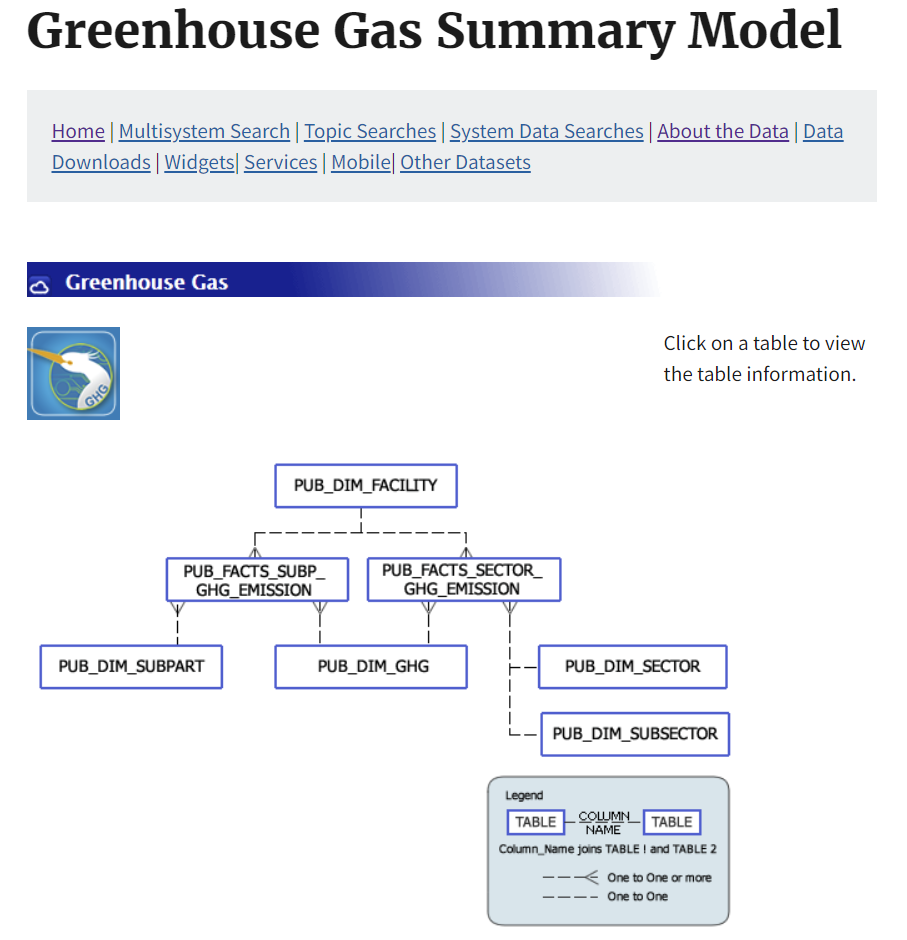

In [1]:
#set up libraries
import pandas as pd
import numpy as np
import io 
import requests
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline

# settings to display all columns and to no display scientific notation to allow plots.
pd.set_option("display.max_columns", None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
#Pull three tables of data from Enviro API on emissions as CSV format and store in dataframe.
url= 'https://enviro.epa.gov/enviro/efservice/PUB_DIM_FACILITY/PUB_FACTS_SECTOR_GHG_EMISSION/PUB_DIM_SECTOR/csv'
result = requests.get(url).content
masterghg = pd.read_csv(io.StringIO(result.decode('utf-8')), engine='python',encoding='utf-8', error_bad_lines=False, skip_blank_lines=True)
masterghg.head(10)

,PUB_DIM_FACILITY.FACILITY_ID,PUB_DIM_FACILITY.LATITUDE,PUB_DIM_FACILITY.LONGITUDE,PUB_DIM_FACILITY.CITY,PUB_DIM_FACILITY.STATE,PUB_DIM_FACILITY.ZIP,PUB_DIM_FACILITY.COUNTY_FIPS,PUB_DIM_FACILITY.COUNTY,PUB_DIM_FACILITY.ADDRESS1,PUB_DIM_FACILITY.ADDRESS2,PUB_DIM_FACILITY.FACILITY_NAME,PUB_DIM_FACILITY.STATE_NAME,PUB_DIM_FACILITY.NAICS_CODE,PUB_DIM_FACILITY.YEAR,PUB_DIM_FACILITY.BAMM_USED_DESC,PUB_DIM_FACILITY.EMISSION_CLASSIFICATION_CODE,PUB_DIM_FACILITY.PROGRAM_NAME,PUB_DIM_FACILITY.PROGRAM_SYS_ID,PUB_DIM_FACILITY.FRS_ID,PUB_DIM_FACILITY.CEMS_USED,PUB_DIM_FACILITY.CO2_CAPTURED,PUB_DIM_FACILITY.REPORTED_SUBPARTS,PUB_DIM_FACILITY.BAMM_APPROVED,PUB_DIM_FACILITY.EMITTED_CO2_SUPPLIED,PUB_DIM_FACILITY.TRIBAL_LAND_ID,PUB_DIM_FACILITY.EGGRT_FACILITY_ID,PUB_DIM_FACILITY.PUBLIC_XML,PUB_DIM_FACILITY.PARENT_COMPANY,PUB_DIM_FACILITY.PUBLIC_XML_XML,PUB_DIM_FACILITY.REPORTED_INDUSTRY_TYPES,PUB_DIM_FACILITY.FACILITY_TYPES,PUB_DIM_FACILITY.SUBMISSION_ID,PUB_DIM_FACILITY.UU_RD_EXEMPT,PUB_DIM_FACILITY.REPORTING_STATUS,PUB_DIM_FACILITY.PROCESS_STATIONARY_CML,PUB_DIM_FACILITY.COMMENTS,PUB_DIM_FACILITY.RR_MRV_PLAN_URL,PUB_DIM_FACILITY.RR_MONITORING_PLAN_FILENAME,PUB_FACTS_SECTOR_GHG_EMISSION.FACILITY_ID,PUB_FACTS_SECTOR_GHG_EMISSION.YEAR,PUB_FACTS_SECTOR_GHG_EMISSION.SECTOR_ID,PUB_FACTS_SECTOR_GHG_EMISSION.SUBSECTOR_ID,PUB_FACTS_SECTOR_GHG_EMISSION.GAS_ID,PUB_FACTS_SECTOR_GHG_EMISSION.CO2E_EMISSION,PUB_DIM_SECTOR.SECTOR_ID,PUB_DIM_SECTOR.SECTOR_CODE,PUB_DIM_SECTOR.SECTOR_NAME,PUB_DIM_SECTOR.SECTOR_TYPE,PUB_DIM_SECTOR.SECTOR_COLOR,PUB_DIM_SECTOR.SORT_ORDER,Unnamed: 50
0,1000162,32.34940,-108.69750,LORDSBURG,NM,88045,35023.00000,Hidalgo,2 POWER PLANT ROAD,nan,Lordsburg Generating Station,New Mexico,221112.00000,2018,nan,DEFAULT,Clean Air Markets Division Business Database,7349.00000,110022766096.00000,nan,NaN,D,nan,NaN,nan,521153,nan,PNM RESOURCES INC (100%),nan,D,Direct Emitter,177187.00000,NaN,NaN,NaN,NaN,NaN,NaN,1000162,2018,3,1,3.00000,1.78800,3,POWERPLANTS,Power Plants,E,#FFBD59,1.00000,nan
1,1000162,32.34940,-108.69750,LORDSBURG,NM,88045,35023.00000,Hidalgo,2 POWER PLANT ROAD,nan,Lordsburg Generating Station,New Mexico,221112.00000,2018,nan,DEFAULT,Clean Air Markets Division Business Database,7349.00000,110022766096.00000,nan,NaN,D,nan,NaN,nan,521153,nan,PNM RESOURCES INC (100%),nan,D,Direct Emitter,177187.00000,NaN,NaN,NaN,NaN,NaN,NaN,1000162,2018,3,1,2.00000,1.50000,3,POWERPLANTS,Power Plants,E,#FFBD59,1.00000,nan
2,1000162,32.34940,-108.69750,LORDSBURG,NM,88045,35023.00000,Hidalgo,2 POWER PLANT ROAD,nan,Lordsburg Generating Station,New Mexico,221112.00000,2018,nan,DEFAULT,Clean Air Markets Division Business Database,7349.00000,110022766096.00000,nan,NaN,D,nan,NaN,nan,521153,nan,PNM RESOURCES INC (100%),nan,D,Direct Emitter,177187.00000,NaN,NaN,NaN,NaN,NaN,NaN,1000162,2018,3,1,1.00000,3258.10000,3,POWERPLANTS,Power Plants,E,#FFBD59,1.00000,nan
3,1000891,36.85069,-120.64447,Firebaugh,CA,93622,6019.00000,FRESNO COUNTY,47461 W. Nees Ave,nan,Olam West Coast Inc,California,311423.00000,2017,nan,CU_ONLY,Green House Gas e-GGRT,541918.00000,110055506714.00000,nan,NaN,C,nan,NaN,nan,541918,nan,OLAM AMERICAS INC (100%),nan,C,Direct Emitter,159929.00000,NaN,NaN,NaN,NaN,NaN,NaN,1000891,2017,14,24,3.00000,18.47600,14,OTHER,Other,E,#C0E6E6,5.00000,nan
4,1000891,36.85069,-120.64447,Firebaugh,CA,93622,6019.00000,FRESNO COUNTY,47461 W. Nees Ave,nan,Olam West Coast Inc,California,311423.00000,2017,nan,CU_ONLY,Green House Gas e-GGRT,541918.00000,110055506714.00000,nan,NaN,C,nan,NaN,nan,541918,nan,OLAM AMERICAS INC (100%),nan,C,Direct Emitter,159929.00000,NaN,NaN,NaN,NaN,NaN,NaN,1000891,2017,14,24,2.00000,15.50000,14,OTHER,Other,E,#C0E6E6,5.00000,nan
5,1000891,36.85069,-120.64447,Firebaugh,CA,93622,6019.00000,FRESNO COUNTY,47461 W. Nees Ave,nan,Olam West Coast Inc,California,311423.00000,2017,nan,CU_ONLY,Green House Gas e-GGRT,541918.00000,110055506714.00000,nan,NaN,C,nan,NaN,nan,541918,nan,OLAM AMERICAS INC (100%),nan,C,Direct Emitter,159929.00000,NaN,NaN,NaN,Na

In [3]:
# Review entire dataframe. 
masterghg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 51 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   PUB_DIM_FACILITY.FACILITY_ID                   100001 non-null  int64  
 1   PUB_DIM_FACILITY.LATITUDE                      99790 non-null   float64
 2   PUB_DIM_FACILITY.LONGITUDE                     99790 non-null   float64
 3   PUB_DIM_FACILITY.CITY                          100001 non-null  object 
 4   PUB_DIM_FACILITY.STATE                         100001 non-null  object 
 5   PUB_DIM_FACILITY.ZIP                           100001 non-null  int64  
 6   PUB_DIM_FACILITY.COUNTY_FIPS                   95275 non-null   float64
 7   PUB_DIM_FACILITY.COUNTY                        95295 non-null   object 
 8   PUB_DIM_FACILITY.ADDRESS1                      91311 non-null   object 
 9   PUB_DIM_FACILITY.ADDRESS2            

##  Clean and Organize Data

While the data pulled is already in an easy CSV format, I want to clean up the data and remove columns that are not useful for exploring the emissions values. I'll remove columns that do not make sense as well as duplicates, and rename the columns for easier reading.


In [4]:
#Create a copy dataframe to work with.
masterghgedit = masterghg.copy()
masterghgedit.columns
#column_number = masterghg.shape[1]
#print(column_number)

Index(['PUB_DIM_FACILITY.FACILITY_ID', 'PUB_DIM_FACILITY.LATITUDE',
       'PUB_DIM_FACILITY.LONGITUDE', 'PUB_DIM_FACILITY.CITY',
       'PUB_DIM_FACILITY.STATE', 'PUB_DIM_FACILITY.ZIP',
       'PUB_DIM_FACILITY.COUNTY_FIPS', 'PUB_DIM_FACILITY.COUNTY',
       'PUB_DIM_FACILITY.ADDRESS1', 'PUB_DIM_FACILITY.ADDRESS2',
       'PUB_DIM_FACILITY.FACILITY_NAME', 'PUB_DIM_FACILITY.STATE_NAME',
       'PUB_DIM_FACILITY.NAICS_CODE', 'PUB_DIM_FACILITY.YEAR',
       'PUB_DIM_FACILITY.BAMM_USED_DESC',
       'PUB_DIM_FACILITY.EMISSION_CLASSIFICATION_CODE',
       'PUB_DIM_FACILITY.PROGRAM_NAME', 'PUB_DIM_FACILITY.PROGRAM_SYS_ID',
       'PUB_DIM_FACILITY.FRS_ID', 'PUB_DIM_FACILITY.CEMS_USED',
       'PUB_DIM_FACILITY.CO2_CAPTURED', 'PUB_DIM_FACILITY.REPORTED_SUBPARTS',
       'PUB_DIM_FACILITY.BAMM_APPROVED',
       'PUB_DIM_FACILITY.EMITTED_CO2_SUPPLIED',
       'PUB_DIM_FACILITY.TRIBAL_LAND_ID', 'PUB_DIM_FACILITY.EGGRT_FACILITY_ID',
       'PUB_DIM_FACILITY.PUBLIC_XML', 'PUB_DIM_FACILITY.PARENT_

In [5]:
#Remove unwanted columns that are either duplicates are provide irrelevant information.
masterghgedit = masterghg.drop(['PUB_DIM_FACILITY.ADDRESS2','PUB_DIM_FACILITY.BAMM_USED_DESC','PUB_DIM_FACILITY.PROGRAM_SYS_ID',
                    'PUB_DIM_FACILITY.FRS_ID','PUB_DIM_FACILITY.BAMM_APPROVED', 'PUB_DIM_FACILITY.TRIBAL_LAND_ID',
                    'PUB_DIM_FACILITY.EGGRT_FACILITY_ID','PUB_DIM_FACILITY.PUBLIC_XML','PUB_DIM_FACILITY.PUBLIC_XML_XML',
                    'PUB_DIM_FACILITY.SUBMISSION_ID','PUB_DIM_FACILITY.UU_RD_EXEMPT','PUB_DIM_FACILITY.REPORTING_STATUS',
                    'PUB_DIM_FACILITY.PROCESS_STATIONARY_CML','PUB_DIM_FACILITY.COMMENTS','PUB_DIM_FACILITY.RR_MRV_PLAN_URL',
                    'PUB_DIM_FACILITY.RR_MONITORING_PLAN_FILENAME','PUB_DIM_FACILITY.STATE_NAME','PUB_DIM_FACILITY.CEMS_USED',
                    'PUB_FACTS_SECTOR_GHG_EMISSION.FACILITY_ID','PUB_FACTS_SECTOR_GHG_EMISSION.YEAR','PUB_DIM_SECTOR.SECTOR_ID',
                    'PUB_DIM_SECTOR.SECTOR_COLOR','PUB_DIM_SECTOR.SORT_ORDER', 'Unnamed: 50'], axis=1)

In [6]:
#Rename column headers of dataframe to be easier for analysis.
masterghgedit.rename(columns = {"PUB_DIM_FACILITY.FACILITY_ID":"Facility_ID", 
                            "PUB_DIM_FACILITY.LATITUDE":"Facility_Latitude", 
                            "PUB_DIM_FACILITY.LONGITUDE":"Facility_Longitude",
                            "PUB_DIM_FACILITY.CITY":"Facility_City",
                            "PUB_DIM_FACILITY.STATE":"Facility_State",
                            "PUB_DIM_FACILITY.ZIP":"Facility_Zip",
                            "PUB_DIM_FACILITY.COUNTY_FIPS":"County_FIPS",
                            "PUB_DIM_FACILITY.COUNTY":"Facility_County",
                            "PUB_DIM_FACILITY.ADDRESS1":"Facility_Address",
                            "PUB_DIM_FACILITY.FACILITY_NAME":"Facility_Name",
                            "PUB_DIM_FACILITY.NAICS_CODE":"NAICS_Code",
                            "PUB_DIM_FACILITY.YEAR":"Facility_Year",
                            "PUB_DIM_FACILITY.EMISSION_CLASSIFICATION_CODE":"Classification_Code",
                            "PUB_DIM_FACILITY.PROGRAM_NAME":"Program_Name",
                            "PUB_DIM_FACILITY.CO2_CAPTURED":"CO2_Captured",
                            "PUB_DIM_FACILITY.REPORTED_SUBPARTS":"Reported_Subparts",
                            "PUB_DIM_FACILITY.EMITTED_CO2_SUPPLIED":"Emitted_CO2_Supplied",
                            "PUB_DIM_FACILITY.PARENT_COMPANY":"Parent_Company",
                            "PUB_DIM_FACILITY.REPORTED_INDUSTRY_TYPES":"Industry_Types",
                            "PUB_DIM_FACILITY.FACILITY_TYPES":"Facility_Types",
                            "PUB_FACTS_SECTOR_GHG_EMISSION.SECTOR_ID":"Sector_ID",  
                            "PUB_FACTS_SECTOR_GHG_EMISSION.SUBSECTOR_ID":"Subsector_ID",
                            "PUB_FACTS_SECTOR_GHG_EMISSION.GAS_ID":"Gas_ID",
                            "PUB_FACTS_SECTOR_GHG_EMISSION.CO2E_EMISSION":"C02E_Emission",
                            "PUB_DIM_SECTOR.SECTOR_CODE":"Sector_Code",
                            "PUB_DIM_SECTOR.SECTOR_NAME":"Sector_Name",
                            "PUB_DIM_SECTOR.SECTOR_TYPE":"Sector_Type"
                           },
                inplace="True")
masterghgedit.head(10)

,Facility_ID,Facility_Latitude,Facility_Longitude,Facility_City,Facility_State,Facility_Zip,County_FIPS,Facility_County,Facility_Address,Facility_Name,NAICS_Code,Facility_Year,Classification_Code,Program_Name,CO2_Captured,Reported_Subparts,Emitted_CO2_Supplied,Parent_Company,Industry_Types,Facility_Types,Sector_ID,Subsector_ID,Gas_ID,C02E_Emission,Sector_Code,Sector_Name,Sector_Type
0,1000162,32.34940,-108.69750,LORDSBURG,NM,88045,35023.00000,Hidalgo,2 POWER PLANT ROAD,Lordsburg Generating Station,221112.00000,2018,DEFAULT,Clean Air Markets Division Business Database,NaN,D,NaN,PNM RESOURCES INC (100%),D,Direct Emitter,3,1,3.00000,1.78800,POWERPLANTS,Power Plants,E
1,1000162,32.34940,-108.69750,LORDSBURG,NM,88045,35023.00000,Hidalgo,2 POWER PLANT ROAD,Lordsburg Generating Station,221112.00000,2018,DEFAULT,Clean Air Markets Division Business Database,NaN,D,NaN,PNM RESOURCES INC (100%),D,Direct Emitter,3,1,2.00000,1.50000,POWERPLANTS,Power Plants,E
2,1000162,32.34940,-108.69750,LORDSBURG,NM,88045,35023.00000,Hidalgo,2 POWER PLANT ROAD,Lordsburg Generating Station,221112.00000,2018,DEFAULT,Clean Air Markets Division Business Database,NaN,D,NaN,PNM RESOURCES INC (100%),D,Direct Emitter,3,1,1.00000,3258.10000,POWERPLANTS,Power Plants,E
3,1000891,36.85069,-120.64447,Firebaugh,CA,93622,6019.00000,FRESNO COUNTY,47461 W. Nees Ave,Olam West Coast Inc,311423.00000,2017,CU_ONLY,Green House Gas e-GGRT,NaN,C,NaN,OLAM AMERICAS INC (100%),C,Direct Emitter,14,24,3.00000,18.47600,OTHER,Other,E
4,1000891,36.85069,-120.64447,Firebaugh,CA,93622,6019.00000,FRESNO COUNTY,47461 W. Nees Ave,Olam West Coast Inc,311423.00000,2017,CU_ONLY,Green House Gas e-GGRT,NaN,C,NaN,OLAM AMERICAS INC (100%),C,Direct Emitter,14,24,2.00000,15.50000,OTHER,Other,E
5,1000891,36.85069,-120.64447,Firebaugh,CA,93622,6019.00000,FRESNO COUNTY,47461 W. Nees Ave,Olam West Coast Inc,311423.00000,2017,CU_ONLY,Green House Gas e-GGRT,NaN,C,NaN,OLAM AMERICAS INC (100%),C,Direct Emitter,14,24,1.00000,33155.10000,OTHER,Other,E
6,1000421,44.32040,-88.20890,Kaukauna,WI,54130,55087.00000,Outagamie,310 East Frontage Road,Fox Energy Center,221112.00000,2018,CU_OTHERS,Clean Air Markets Division Business Database,NaN,"C,D",NaN,WEC Energy Group (100%),"C,D",Direct Emitter,3,1,3.00000,683.31400,POWERPLANTS,Power Plants,E
7,1000421,44.32040,-88.20890,Kaukauna,WI,54130,55087.00000,Outagamie,310 East Frontage Road,Fox Energy Center,221112.00000,2018,CU_OTHERS,Clean Air Markets Division Business Database,NaN,"C,D",NaN,WEC Energy Group (100%),"C,D",Direct Emitter,3,1,2.00000,573.25000,POWERPLANTS,Power Plants,E
8,1000421,44.32040,-88.20890,Kaukauna,WI,54130,55087.00000,Outagamie,310 East Frontage Road,Fox Energy Center,221112.00000,2018,CU_OTHERS,Clean Air Markets Division Business Database,NaN,"C,D",NaN,WEC Energy Group (100%),"C,D",Direct Emitter,3,1,1.00000,1236354.50000,POWERPLANTS,Power Plants,E
9,1000352,34.84998,-102.28679,Hereford,TX,79045,48117.00000,DEAF SMITH COUNTY,4300 CR 8,"Green Plains Hereford, LLC",325193.00000,2017,CU_ONLY,Green House Gas e-GGRT,NaN,C,NaN,GREEN PLAINS RENEWABLE ENERGY INC (100%),C,Direct Emitter,14,25,3.00000,47.97800,OTHER,Other,E


With a more concise dataset, we can see more clearly what we are working with. For the majority of the analysis going forward, it will hinge on C02E_Emission. The emission variable is really the only quantitative variable to work with. CO2_Captured was a possible variable but it only has 1218 values which is extremely small compared to CO2_Emission. Therefore, CO2E_Emission will be our main variable of focus. CO2E is also a carbond dioxide equivalent (measured in tonnes) and it's the toal carbon dioxide equivalent of all GHG gasses.

In [7]:
#Updated review of columns in cleaned dataframe.
masterghgedit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Facility_ID           100001 non-null  int64  
 1   Facility_Latitude     99790 non-null   float64
 2   Facility_Longitude    99790 non-null   float64
 3   Facility_City         100001 non-null  object 
 4   Facility_State        100001 non-null  object 
 5   Facility_Zip          100001 non-null  int64  
 6   County_FIPS           95275 non-null   float64
 7   Facility_County       95295 non-null   object 
 8   Facility_Address      91311 non-null   object 
 9   Facility_Name         100001 non-null  object 
 10  NAICS_Code            99998 non-null   float64
 11  Facility_Year         100001 non-null  int64  
 12  Classification_Code   100001 non-null  object 
 13  Program_Name          100001 non-null  object 
 14  CO2_Captured          1218 non-null    object 
 15  

In [8]:
#Looking at the unique strings in the Sector Code column for better refernce for analysis.
masterghgedit['Sector_Code'].unique()

array(['POWERPLANTS', 'OTHER', 'WASTE', 'NG_NGL_SUP', 'PULPANDPAPER',
       'CHEMICALS', 'PETRO_NG', 'MINERALS', 'CO2_SUP', 'METALS',
       'PETROLEUM_SUP', 'REFINERIES', 'INJ', 'QQ', 'IG_SUP',
       'COAL_TO_LIQUIDS_SUP'], dtype=object)

## Explore the data

As a refresher, the goal of this analysis is to discover trends on emissions, from both states as well as industry sectors. We will examine the top five emitting states to help simplify our discussion. 

In [9]:
#The average, minimum and maximum CO2 Emission for US per year.
masterghgedit.groupby(["Facility_Year"])["C02E_Emission"].agg([np.mean, np.min, np.max])

,mean,amin,amax
Facility_Year,,,
2010,432261.27150,0.00000,75811031.00000
2011,350613.83004,0.00000,80841904.00000
2012,335435.64393,-122694.24942,85895740.80000
2013,302037.86010,0.00000,76097618.24000
2014,271933.94611,0.00000,48341952.70000
2015,341254.40750,0.00000,86160893.33149
2016,305220.23863,0.00000,85411041.18705
2017,313514.60534,-265472.43490,89561870.78713
2018,357390.67378,-1023.72000,90855626.27649


Overall, we can see that the highest average CO2 Emissions year was 2011. The lowest year was 2014, and the next five years seem to stay around the mid 300,000 tonnes. 

In [10]:
masterghgedit.groupby(["Sector_Code"])["C02E_Emission"].agg([np.mean, np.min, np.max])


,mean,amin,amax
Sector_Code,,,
CHEMICALS,210021.63917,0.00000,9709846.34600
CO2_SUP,3288988.28885,19464.80000,8963788.30000
COAL_TO_LIQUIDS_SUP,335260.50000,131848.00000,470403.00000
IG_SUP,nan,nan,nan
INJ,706613.20000,0.00000,3661626.40000
METALS,259536.11231,0.10000,11369260.20000
MINERALS,111103.94811,0.00000,2710079.80000
NG_NGL_SUP,2735968.34166,0.00000,46584491.90000
OTHER,40054.35939,-1023.72000,4672473.10000


The chart above looks at average emissions for all sectors reported. Petroleum product suppliers have the highest average over the 8 year period, significantly higher than others. The lowest reported average tonnes of CO2E was Petro_NG.

In [11]:
masterghgedit["Parent_Company"].value_counts()

WASTE MANAGEMENT INC (100%)                               1960
Waste Management, Inc. (100%)                             1894
KINDER MORGAN INC (100%)                                  1204
REPUBLIC SERVICES INC (100%)                               930
KOCH INDUSTRIES INC (100%)                                 899
                                                          ... 
CITY OF NEBRASKA CITY NEBRASKA (100%)                        1
Clearfield Energy (100%)                                     1
CNX Resources Corp (100%)                                    1
COUNTY OF LOUDON (100%)                                      1
City of Redlands Municipal Utilities Department (100%)       1
Name: Parent_Company, Length: 7771, dtype: int64

As I was curious to see which parent companies had the most reports recorded, Waste Management, Inc. has the largest number at a combined count of 3854. What is interesting is that they had the third lowest average of CO2E though.

In [12]:
#find states with the highest emissions
TopFiveStates = masterghgedit.groupby('Facility_State').C02E_Emission.sum().nlargest(5)
TopFiveStates
#sns.barplot(x="C02E_Emission", y="Facility_State", data=TopFiveStates, palette ='Reds').set(title="Top Five Titles based on IMDB Score")

Facility_State
TX   7379094445.49112
LA   3292134982.02254
CA   2019204713.74647
IL   1529675522.45500
IN   1293727405.91903
Name: C02E_Emission, dtype: float64

A central question to my analysis of the greenhouse gas emissions dataset is what states have the largest emissions over this period of time. From summing up all the emissions, I discovered that Texas has the largest overall tonnes of emissions, with Louisiana, California, Illinois and Indiana also making up the top five biggest CO2E producing states.

In [40]:
#Chart the average emissions per sector for each state.

masterghgedit.groupby(["Facility_State","Sector_Code"])["C02E_Emission"].agg([np.mean])

mean
Facility_State Sector_Code                
AK             CHEMICALS       52367.03529
               NG_NGL_SUP    1687810.76000
               OTHER           30921.49626
               PETROLEUM_SUP 2525733.83499
               PETRO_NG       121025.34914
...                                    ...
WY             PETROLEUM_SUP 5619974.16865
               PETRO_NG        49497.94203
               POWERPLANTS    527633.78927
               REFINERIES     139562.12881
               WASTE           31140.13007

[589 rows x 1 columns]

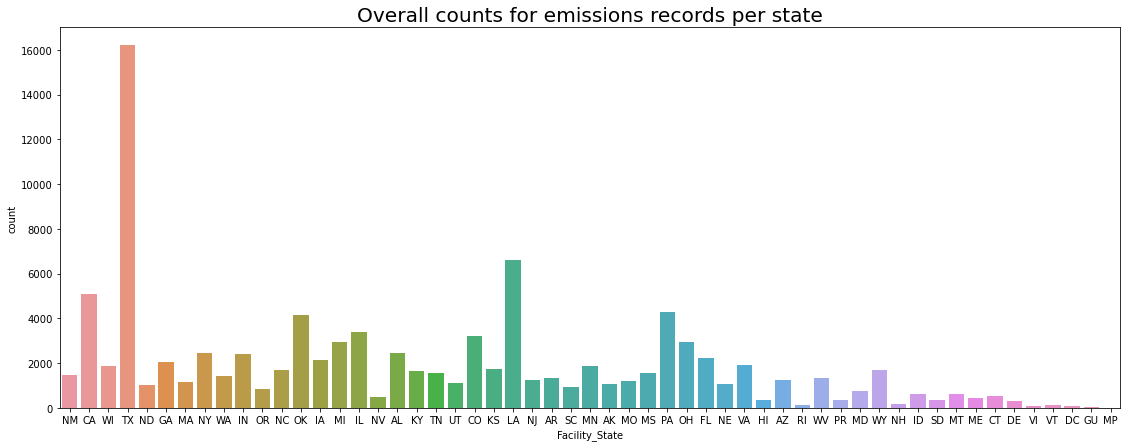

In [14]:
#seeing which states reported most times 
fig, states = plt.subplots(figsize = (19,7))
plt.style.use('fivethirtyeight')
states = sns.countplot(x ='Facility_State', data=masterghgedit).set(title="Overall counts for emissions records per state")

The figure above shows which states have the highest reported counts from the Enviro database. Texas, Louisiana, California, Oklahoma and Pennsylvania have the largest counts for recorded emissions data. 

[Text(0.5, 1.0, 'Total Emissions Recorded for US Facilites by year')]

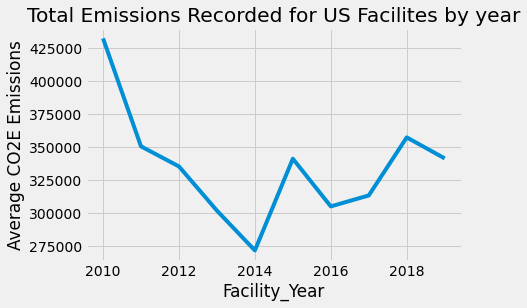

In [15]:
#chart emissions nationwide over last 5 years
plt.style.use('fivethirtyeight')
plt.ylabel('Average CO2E Emissions')
masterghgedit.groupby('Facility_Year').C02E_Emission.mean().plot(kind="line").set(title="Total Emissions Recorded for US Facilites by year")

The above plot looks at the Total average emissions in the US over the eight year period. We can see a significant dip in emissions in 2014. However, we can still see an overall increasing trend in emissions after. It should be noted that they average emissions has decreased for the US.

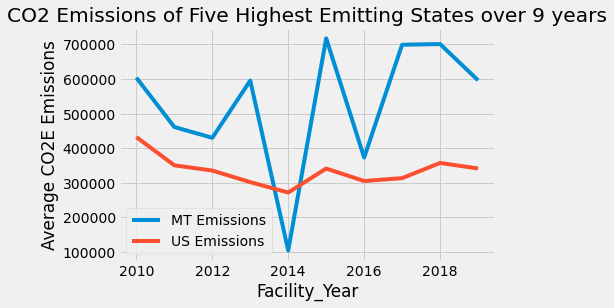

In [25]:
#chart MT emissions over last five years
#mtemissions = masterghgedit.loc[masterghgedit['Facility_State'] == 'MT']
#mtemissions.plot('Facility_Year','C02E_Emission')

use = masterghgedit.groupby('Facility_Year').C02E_Emission.mean()
mte = masterghgedit.loc[masterghgedit['Facility_State'] == 'MT'].groupby('Facility_Year').C02E_Emission.mean()

ax = plt.gca()
mte.plot(kind='line',x='Facility_Year',y='C02E_Emission',label='MT Emissions', ax=ax)
use.plot(kind='line',x='Facility_Year',y='C02E_Emission',label='US Emissions', ax=ax)

plt.legend()
plt.style.use('fivethirtyeight')
plt.ylabel('Average CO2E Emissions')
plt.title("CO2 Emissions of Five Highest Emitting States over 9 years")
plt.show() 


With some curiousity, I also wanted to see how our home state of Montana compared to the national average tonnes of CO2E over the eight year timeframe. From the graph it appears that Montana is generally above average on CO2E emissions; however, it should be noted that there are a couple territories, like Northern Mariana Islands (MP) that do not have any reported values and bring the average down. Overall, Montana still seems to have a slightly above average emissions reported, and even a slight increase in CO2E emissions from 2014 to 2018.

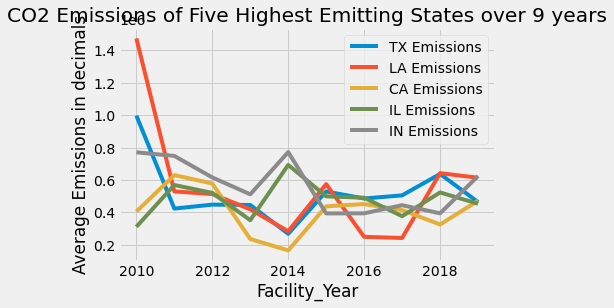

In [24]:
#plot emissions over time with the states with highest average emissions.
txe = masterghgedit.loc[masterghgedit['Facility_State'] == 'TX'].groupby('Facility_Year').C02E_Emission.mean()
lae = masterghgedit.loc[masterghgedit['Facility_State'] == 'LA'].groupby('Facility_Year').C02E_Emission.mean()
cae = masterghgedit.loc[masterghgedit['Facility_State'] == 'CA'].groupby('Facility_Year').C02E_Emission.mean()
ile = masterghgedit.loc[masterghgedit['Facility_State'] == 'IL'].groupby('Facility_Year').C02E_Emission.mean()
ine = masterghgedit.loc[masterghgedit['Facility_State'] == 'IN'].groupby('Facility_Year').C02E_Emission.mean()

ax = plt.gca()
txe.plot(kind='line',x='Facility_Year',y='C02E_Emission',label='TX Emissions', ax=ax)
lae.plot(kind='line',x='Facility_Year',y='C02E_Emission',label='LA Emissions', ax=ax)
cae.plot(kind='line',x='Facility_Year',y='C02E_Emission',label='CA Emissions', ax=ax)
ile.plot(kind='line',x='Facility_Year',y='C02E_Emission',label='IL Emissions', ax=ax)
ine.plot(kind='line',x='Facility_Year',y='C02E_Emission',label='IN Emissions', ax=ax)
plt.legend()
plt.style.use('fivethirtyeight')
plt.ylabel('Average Emissions in decimals')
plt.title("CO2 Emissions of Five Highest Emitting States over 9 years")
plt.show() 

The CO2E Emissions of the Five States with largest emission shows that Louisiana started out with the largest average in 2010 and dropped significantly. Texas started out with the second largest average but kept a pretty steady emissions average, staying towards the top. Not suprisingly, all five states seem to be fairly close in 2019 average emissions with regulations and climate awareness becoming more mainstream.

Text(0.5, 1.0, 'Total emissions per year over time for each Facility Sector')

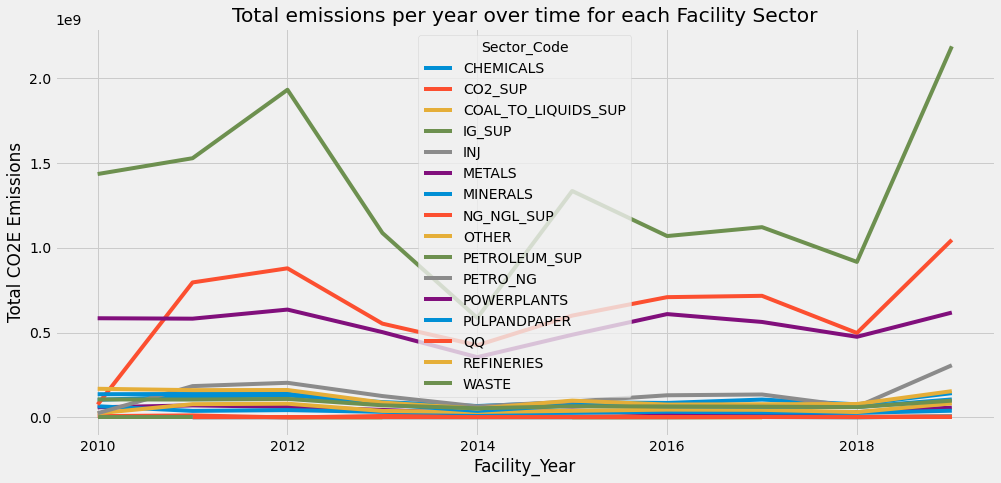

In [19]:
#plot emissions over time with sector hue
#masterghgedit.groupby(['Sector_Code','Facility_Year'])['C02E_Emission'].agg('sum')
fig, ax = plt.subplots(figsize=(15,7))
masterghgedit.groupby(['Facility_Year', 'Sector_Code']).sum()['C02E_Emission'].unstack().plot(ax=ax)
plt.style.use('fivethirtyeight')
plt.ylabel('Total CO2E Emissions')
ax.set_title("Total emissions per year over time for each Facility Sector")

One final part to the analysis is how each industry sector for the facilities reporting over time compare. From the plot above, the most influential sector is Petroleum_Sup. Natural Gas and Natural Gas Suppliers (NG_NGL_SUP) is the second largeest sector for emissions in the US, with powerplants as the third. The other sectors all are much smaller in comparison.

In [42]:
#Display a contingency table of States and Sector Codes reported to get a sense of the distribution and how the Sectors impact
#state emissions.
pd.crosstab(masterghgedit["Sector_Code"], masterghgedit["Facility_State"],margins=True)

Facility_State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,GU,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MP,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,PR,RI,SC,SD,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY,All
Sector_Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CHEMICALS,17,256,69,3,158,29,10,0,21,105,78,0,12,89,12,235,18,140,156,867,42,24,0,56,51,36,0,55,31,82,26,38,0,76,13,12,29,178,140,24,92,37,0,40,0,95,1138,25,27,0,0,58,4,151,70,4925
CO2_SUP,0,38,0,0,52,9,0,0,8,0,18,0,6,20,0,29,26,22,4,25,0,0,0,9,20,6,0,11,0,1,16,13,0,0,31,0,19,17,36,5,0,0,0,0,0,11,95,8,8,0,0,23,15,7,24,632
COAL_TO_LIQUIDS_SUP,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
IG_SUP,0,17,7,0,7,0,0,0,13,6,9,0,0,0,0,24,6,6,11,6,7,0,0,7,12,0,1,5,0,6,0,0,0,26,0,4,5,8,5,0,37,0,0,8,0,4,23,0,2,0,0,0,1,7,0,280
INJ,0,7,5,0,5,10,0,0,0,0,0,0,0,0,0,5,0,0,0,1,0,0,0,11,0,0,0,16,0,0,10,0,0,0,40,0,0,0,10,0,0,0,0,0,0,0,94,0,0,0,0,0,0,6,24,244
METALS,0,109,24,3,49,15,4,0,3,0,15,0,0,34,0,100,228,0,117,39,0,10,0,83,82,33,0,6,7,12,0,0,0,19,0,3,69,162,12,18,223,0,0,17,3,29,87,33,11,0,0,53,24,30,0,1766
MINERALS,0,112,34,33,154,21,0,0,0,38,54,0,0,65,64,47,141,20,94,6,63,15,3,176,120,42,0,21,60,130,84,15,18,39,41,70,87,228,124,0,199,26,0,30,30,89,294,27,62,0,0,61,117,42,146,3342
NG_NGL_SUP,5,122,25,19,74,96,25,0,15,61,105,0,0,55,3,50,114,44,46,112,40,25,9,44,39,46,0,24,41,49,74,19,6,22,23,23,89,67,42,13,79,0,8,34,2,115,331,28,47,0,7,32,59,47,75,2530
OTHER,77,235,121,254,660,166,86,36,62,125,315,0,31,834,205,721,473,262,203,218,326,88,122,368,516,208,0,217,23,314,94,431,5,91,152,35,443,405,102,323,425,6,22,146,203,210,1068,216,447,9,90,323,239,246,0,12997


The contingency table above shows the distribution of sectors across each state. We can see that 27% (312\1149) of petroleum suppliers facilities are in Texas. As we saw that that sector had a large influence on the total emissions across the nation, we can see that Texas then has a large influence on emissions from facilities in the US. Similarly, 13% of Natural Gas Supplier facilities are located in Texas (331/2530), and with Natural Gas suppliers making up a significant proporation of emissions in the US, Texas agains has a large influence.

##  Key takeaways 

From the analysis, there are a few interesting notes I discovered. For 2014, there seems to be a drop in emissions nationwide. Further analysis into 2014 petroleum shows a start drop in import prices on petroleum which seems to have hindered production of petroleum with the US. A key point to make is the location of the facilities emitting, with a large portion being located in Texas. When discussing emissions, it is then crucial to look at the most influential sectors and where they are located.

Next steps to analyze greenhouse gas emissions would focus on creating statistical models that might be able to predict emissions for each sector, and potentially each state. However, that is a difficult task as emissions change drastically from situational factors as we can see in 2014 for petroleum.